In [108]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset as the YouTube video,
# use this link: https://drive.google.com/file/d/1WLm1AEYgU28Nk4lY4zNkGPSctdImbhJI/view?usp=sharing

In [109]:
import pandas as pd
import datetime

# Stocks :- AAPL, MSFT, AMZN, NVDA, TSLA, GOOGL
# Sector Indices :- SSINFT (^SP500-45)


method= 'DistilBERT'
ticker = "SSINFT"

df = pd.read_csv(f"SentimentAnalysis/{method}/{ticker}sentiment_agg_stock_trend_output.csv")
df

,Date,Headline,Summary,sentiment_score,polarity,Open,High,Low,Close,Adj Close,Volume,Difference,price_trend,next_day_price_trend
0,2015-01-02,should microchip technology be in your portfol...,,-3.012191,-0.430313,692.000000,698.369995,686.520020,690.919983,690.919983,0,-1.080017,0,0
1,2015-01-05,gartner no return for tablet sales boom sp st...,,-6.675478,-0.741720,690.070007,690.070007,677.210022,678.719971,678.719971,0,-11.350037,0,0
2,2015-01-06,charter cisco said to unveil webbased interfac...,,-3.594456,-0.299538,678.729980,681.119995,666.940002,670.419983,670.419983,0,-8.309998,0,1
3,2015-01-07,playstation nows monthly fee could be a barga...,,-3.955889,-0.988972,670.440002,678.080017,670.440002,676.219971,676.219971,0,5.779968,1,1
4,2015-01-08,carl icahn says apple is my favorite stock sti...,,-0.029933,-0.002494,676.229980,693.309998,676.229980,691.580017,691.580017,0,15.350037,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,2022-12-22,us international trade commission says apple w...,\n\tneedham analyst laura martin reiterated ...,-16.071072,-0.669628,2229.679932,2229.679932,2136.860107,2173.040039,2173.040039,556729200,-56.639893,0,1
2004,2022-12-23,information technology stocks with whale aler...,this whale alert can help traders discover the...,-3.825172,-0.318764,2173.040039,2177.379883,2142.250000,2175.540039,2175.540039,327810900,2.500000,1,0
2005,2022-12-27,these are the most popular video games of and...,was a big year for the esports industry now t...,-8.426076,-0.351086,2175.540039,2175.540039,2142.320068,2154.379883,2154.379883,351833800,-21.160156,0,0
2006,2022-12-28,exclusive amazon delta air lines and salesforc...,adam johnson portfolio manager at adviser inve...,-4.786054,-0.281533,2154.379883,2168.620117,2117.179932,2118.969971,2118.969971,345843500,-35.409912,0,1


In [110]:
df = df[['Date', 'Close', 'polarity']]

In [111]:
# # Normalize the 'Close' and 'polarity' columns using min-max scaling
# min_close = df['Close'].min()
# max_close = df['Close'].max()

# min_polarity = df['polarity'].min()
# max_polarity = df['polarity'].max()

# df['Close'] = (df['Close'] - min_close) / (max_close - min_close)
# df['polarity'] = (df['polarity'] - min_polarity) / (max_polarity - min_polarity)


In [112]:
df["Date"] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
df.index = df.pop('Date')

/var/folders/k5/n_27wv3d0gldn5ynsvpk_6bm0000gn/T/ipykernel_2848/2083383011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df['Date'], format="%Y-%m-%d")


(array([16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993., 19358.]),
 [Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023')])

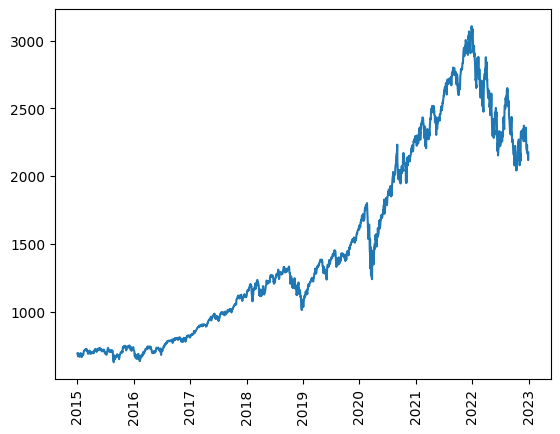

In [113]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.plot(df.index, df['Close'])
plt.xticks(rotation=90)

In [114]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = pd.to_datetime(first_date_str, format="%Y-%m-%d")
    last_date  = pd.to_datetime(last_date_str, format="%Y-%m-%d")
    target_date = first_date

    dates = []
    X, Y, Polarity = [], [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]
        target_polarity = df_subset['polarity'].iloc[-1]  # Fetch polarity for target date

        dates.append(target_date)
        X.append(x)
        Y.append(y)
        Polarity.append(target_polarity)  # Store polarity

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        if last_time:
            break

        target_date = next_date
        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates
    X = np.array(X)
    for i in range(0, n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y
    ret_df['Target Polarity'] = Polarity  # Include polarity in returned dataframe

    return ret_df

windowed_df = df_to_windowed_df(df, '2021-03-25', '2022-03-25', n=3)

windowed_df

,Target Date,Target-3,Target-2,Target-1,Target,Target Polarity
0,2021-03-25,2317.030029,2302.310059,2274.520020,2272.899902,-0.425588
1,2021-03-26,2302.310059,2274.520020,2272.899902,2330.550049,-0.266073
2,2021-03-29,2274.520020,2272.899902,2330.550049,2318.629883,-0.164897
3,2021-03-30,2272.899902,2330.550049,2318.629883,2296.679932,-0.438408
4,2021-03-31,2330.550049,2318.629883,2296.679932,2331.060059,-0.444133
...,...,...,...,...,...,...
249,2022-03-21,2646.169922,2664.419922,2722.709961,2717.899902,-0.314797
250,2022-03-22,2664.419922,2722.709961,2717.899902,2756.550049,-0.382297
251,2022-03-23,2722.709961,2717.899902,2756.550049,2715.110107,-0.371548
252,2022-03-24,2717.899902,2756.550049,2715.110107,2788.629883,-0.530611


In [115]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    dates = df_as_np[:, 0]
    
    # Create a matrix that contains Close values and the target polarity for each record
    middle_matrix = np.column_stack((df_as_np[:, 1:-2], df_as_np[:, -1][:, np.newaxis]))
    
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    Y = df_as_np[:, -2]  # Get the 'Target' values


    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((254,), (254, 4, 1), (254,))

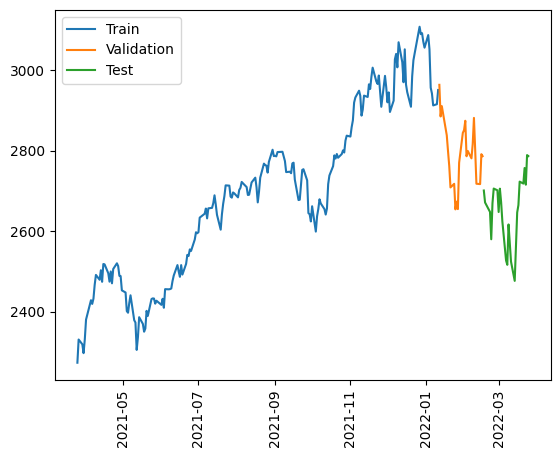

In [116]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.xticks(rotation=90)
plt.legend(['Train', 'Validation', 'Test'])

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
# Adjusting the input shape
input_shape = (X.shape[1], 1)  # This will now be (4, 1) - 3 for 'Close' values and 1 for the target polarity

model = Sequential([
    layers.Input(shape=input_shape),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 40ms/step - loss: 7268047.5000 - mean_absolute_error: 2687.8457 - val_loss: 7792996.5000 - val_mean_absolute_error: 2790.4968
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 7265909.5000 - mean_absolute_error: 2687.4482 - val_loss: 7790601.5000 - val_mean_absolute_error: 2790.0679
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 7263265.5000 - mean_absolute_error: 2686.9563 - val_loss: 7787195.0000 - val_mean_absolute_error: 2789.4575
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 7259517.5000 - mean_absolute_error: 2686.2561 - val_loss: 7782400.0000 - val_mean_absolute_error: 2788.5979
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 7254309.0000 - mean_absolute_error: 2685.2898 - val_loss: 7775793.5000 - val_mean_absolute_error: 2787.4131
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 7247072.5000 - mean_absolute_erro

In [118]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error on the test set: {loss}")

Mean Squared Error on the test set: 8136.50830078125


7/7 [==============================] - 0s 911us/step


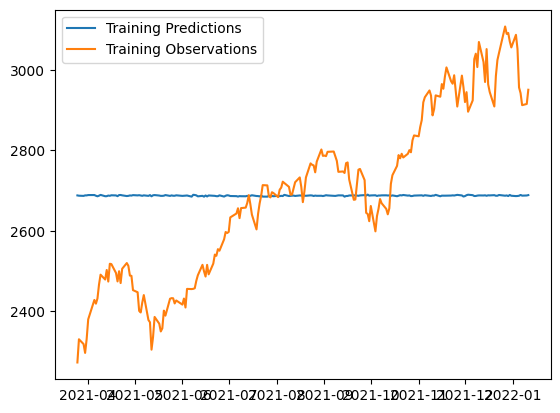

In [119]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 12ms/step


(array([19005., 19009., 19013., 19017., 19021., 19024., 19028., 19032.,
        19036., 19040.]),
 [Text(19005.0, 0, '2022-01-13'),
  Text(19009.0, 0, '2022-01-17'),
  Text(19013.0, 0, '2022-01-21'),
  Text(19017.0, 0, '2022-01-25'),
  Text(19021.0, 0, '2022-01-29'),
  Text(19024.0, 0, '2022-02-01'),
  Text(19028.0, 0, '2022-02-05'),
  Text(19032.0, 0, '2022-02-09'),
  Text(19036.0, 0, '2022-02-13'),
  Text(19040.0, 0, '2022-02-17')])

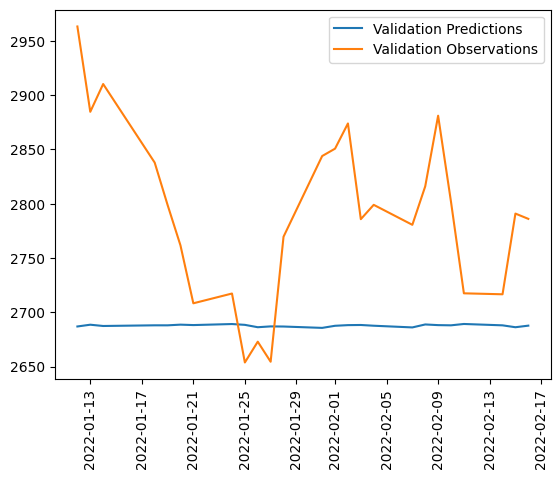

In [120]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.xticks(rotation=90)


1/1 [==============================] - 0s 10ms/step


(array([19040., 19044., 19048., 19052., 19056., 19060., 19064., 19068.,
        19072., 19076.]),
 [Text(19040.0, 0, '2022-02-17'),
  Text(19044.0, 0, '2022-02-21'),
  Text(19048.0, 0, '2022-02-25'),
  Text(19052.0, 0, '2022-03-01'),
  Text(19056.0, 0, '2022-03-05'),
  Text(19060.0, 0, '2022-03-09'),
  Text(19064.0, 0, '2022-03-13'),
  Text(19068.0, 0, '2022-03-17'),
  Text(19072.0, 0, '2022-03-21'),
  Text(19076.0, 0, '2022-03-25')])

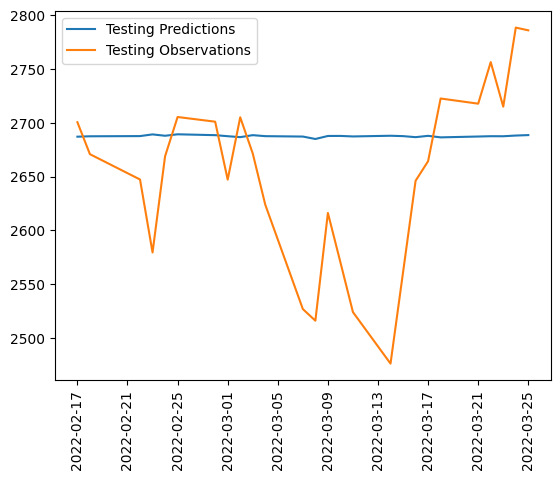

In [121]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.xticks(rotation=90)


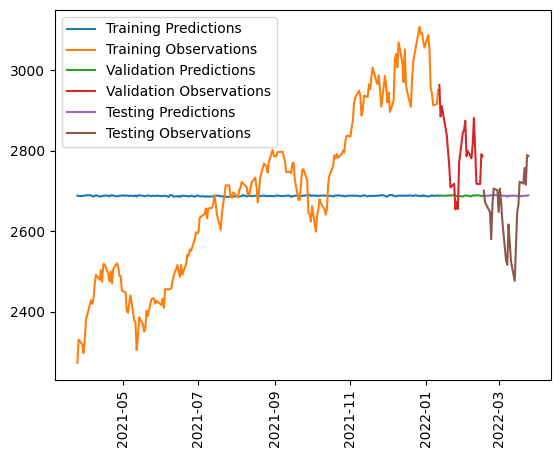

In [122]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.xticks(rotation=90)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])